In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


In [2]:
class Simulation:

    def __init__(self, length = 100, width=100, box=np.zeros((100, 100))):
        
        if not box.shape == (length,width):
            raise ValueError("box dimensions must be (length,width)")
        
        self.length=length
        self.width=width
        self.box = box

    def reset(self):
        self.box = np.zeros((self.length, self.width))
    
    def set_value(self, pos, val):

        if not (val == 0 or val == 1):
            raise ValueError("val must be 0 or 1")
        
        self.box[pos[0], pos[1]] = val
    
    def flip_pos(self, pos):

        self.box[pos[0], pos[1]] = (self.box[pos[0], pos[1]] + 1) % 2
    
    def random_flip(self):

        #Find random neighbor pair 

        random_pos = np.array([np.random.randint(0,self.length), np.random.randint(0,self.width)])
        valid_orientation = False

        orientations = np.array([[0,1], [0,-1], [1,0], [-1,0]])

        while not valid_orientation:
            random_index =int(np.random.randint(0,len(orientations)))
           

            random_neighbor = random_pos + np.array(orientations[random_index])

            if random_neighbor[0] > -1 and random_neighbor[0] < self.length and random_neighbor[1] > -1 and random_neighbor[1] < self.width:
                valid_orientation=True
            else:
                np.delete(orientations, random_index)

        
        #Flip neighbors

        temp = self.box[random_pos[0], random_pos[1]]

        self.box[random_pos[0], random_pos[1]] = self.box[random_neighbor[0], random_neighbor[1]]
        self.box[random_neighbor[0], random_neighbor[1]]=temp
    
    def show(self, save=False, filename="test.png"):
        
        plt.imshow(self.box)

        if save:
            plt.savefig(filename)
        
        plt.show()

        
    



            


        


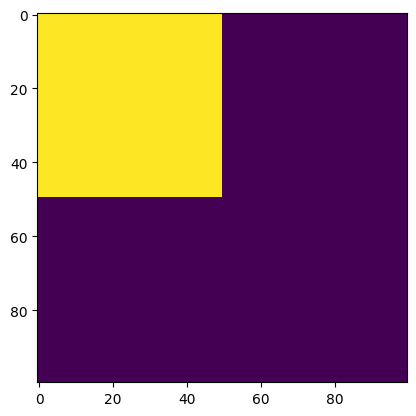

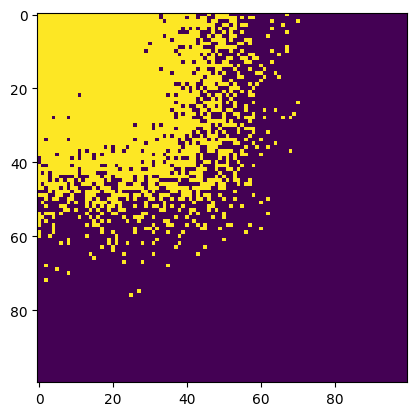

KeyboardInterrupt: 

In [9]:
box = np.zeros((100,100))

box[0:50,0:50]=1

sim = Simulation(100,100, box)

recordSweeps=np.array([0,100,200,400,800,1600,3200,4800,6400,8000])

for j in range(10000):
    
    if np.any(np.isin(recordSweeps, j)):
        sim.show(save=False, filename=f"{j}_snapshot.png")
    for i in range(sim.length*sim.width):
        sim.random_flip()

    


